In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import time
from collections import deque 

## Variable Global

In [2]:
matrizDistancias = []
tiempo = 0

## Funciones Auxiliares Comunes

In [3]:
# Dado un String, Lee el archivo correspondiente
def leeArchivo(archivo):
    f = open("tsp/" + archivo)
    x = []
    y = []
    cont = 0;
    for linea in f:
        cont += 1
        sp = linea.split(" ")
        if cont > 6 and sp[0] != "EOF\n":
            i = -2
            xp = sp[i]
            while xp == "":
                i -= 1
                xp = sp[i]
            yp = sp[-1].split("\n")
            x.append(float(xp))
            y.append(float(yp[0]))  
    return x,y

In [4]:
# Calcula la distancia entre dos puntos (x,y) - (x2,y2)
def calculaDistancia(x, y, x2, y2):
    xd = x - x2
    yd = y - y2
    return round(math.sqrt(xd*xd + yd*yd))

In [5]:
# Pinta todos los puntos recibiendo una lista de puntos x e y
def pintaMapa(x,y):
    plt.figure(figsize=(15, 8))
    plt.scatter(x,y)
    plt.show()

In [6]:
# Dado un vector de resultado, pinta el resultado de este vector sobre los puntos
def pintaCamino(v,x,y,coste):
    plt.figure(figsize=(15, 8))
    xc = []
    yc = []
    for i in v:
            xc.append(x[i])
            yc.append(y[i])
    
    xc.append(x[v[0]])
    yc.append(y[v[0]])
    
    plt.plot(xc,yc,"y")
    plt.scatter(x,y, c = "black")
    plt.scatter(xc[0],yc[0],c="green")
    plt.scatter(xc[-2],yc[-2],c="red")
    
    plt.suptitle("Mejor camino con coste " + str(coste),fontsize=20)
    
    plt.show()    

In [7]:
# Calcula matriz de distancias
def calculaMatrizDistancias(x,y):
    global matrizDistancias 
    matrizDistancias = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            matrizDistancias[i,j] = calculaDistancia(x[i],y[i],x[j],y[j])

In [8]:
# Calcula Coste del vector Solucion
def calculaCoste(vResultado):
    kms = 0;
    for i in range(1,len(vResultado)):
            kms += matrizDistancias[vResultado[i-1]][vResultado[i]]
    kms += matrizDistancias[vResultado[-1]][vResultado[0]]
    return kms

In [9]:
# Calcula Coste Vecino
def calculaCosteVecino(costeSolAntigua, sAntigua, sActual, i1, i2):
    if i1 + 1 > len(sActual) - 1:
        piv1 = 0
    else:
        piv1 = i1 + 1
    
    if i2 + 1 > len(sActual) - 1:
        piv = 0
    else:
        piv = i2 + 1
    
    
    coste = costeSolAntigua - matrizDistancias[sAntigua[i1 - 1]][sAntigua[i1]] - matrizDistancias[sAntigua[ piv1]][sAntigua[i1]]
    coste = coste - matrizDistancias[sAntigua[i2 - 1]][sAntigua[i2]] - matrizDistancias[sAntigua[piv]][sAntigua[i2]]
    coste = coste + matrizDistancias[sActual[i1 - 1]][sActual[i1]] + matrizDistancias[sActual[ piv1]][sActual[i1]]
    coste = coste + matrizDistancias[sActual[i2 - 1]][sActual[i2]] + matrizDistancias[sActual[piv]][sActual[i2]]
    return coste

In [10]:
# Genera solucion aleatoria
def solucionAleatoria(tam, num):
    vResult = list(range(0,tam))
    random.seed(num)
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
    return vResult

In [11]:
# Tic
def tic():
    global tiempo 
    tiempo = time.time()

In [12]:
# Toc
def toc():
    global tiempo 
    return  (time.time() - tiempo)

In [13]:
def representaResultados(analisisResultado):
    tablaFinal = pd.DataFrame(columns=["Semilla","Coste","Numero Evaluaciones", "Tiempo"])
    for i in range(0,10):
        tablaFinal.loc[len(tablaFinal)] = [analisisResultado[i][0],analisisResultado[i][1],analisisResultado[i][2],analisisResultado[i][3]]
        
    display(tablaFinal)
    print("Media coste: ", tablaFinal[["Coste"]].mean()[0])
    print("Desviación típica coste: ", tablaFinal[["Coste"]].std()[0])
    print("Media numero de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].mean()[0])
    print("Desviación típica de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].std()[0])
    print("Media tiempo: ", tablaFinal[["Tiempo"]].mean()[0])

# Fichero a Analizar

In [14]:
# x, y = leeArchivo("st70.tsp")
# x, y = leeArchivo("ch130.tsp")
x, y = leeArchivo("a280.tsp")
# x, y = leeArchivo("p654.tsp")
# x, y = leeArchivo("vm1084.tsp")
# x, y = leeArchivo("vm1748.tsp")
calculaMatrizDistancias(x,y)

# Algoritmo Greedy

In [15]:
# Algoritmo Greedy
def greedy(x,y,mostrar):
    tic()
    vResultado = [];
    nodosNoVisitados = list(range(0,len(x)))
    i = 0;
    vResultado.append(nodosNoVisitados[i])
    del nodosNoVisitados[i]
    while i < len(x) and nodosNoVisitados != []:
        nodoActual = vResultado[-1]
        ordenad = np.sort(matrizDistancias[nodoActual,:])
        k = 0
        encontrado = False
        while k < len(y) and encontrado == False:      
            minimo = np.where(ordenad[k] == matrizDistancias[nodoActual,:])
            max = len(minimo[0])
            z = 0
            while z < max and encontrado == False:
                if (minimo[0][z] in vResultado):
                    k += 1
                    z += 1
                else:
                    encontrado = True
        vResultado.append(minimo[0][z])
        nodosNoVisitados.remove(minimo[0][z])
        i += 1
    km = calculaCoste(vResultado)
    t = toc()
    # pintaMapa(x,y)
    if mostrar == "s":
        print("Tiempo de ejecucion = " + str(t))
        pintaCamino(vResultado,x,y, km)
    return vResultado, km

Tiempo de ejecucion = 0.01899266242980957


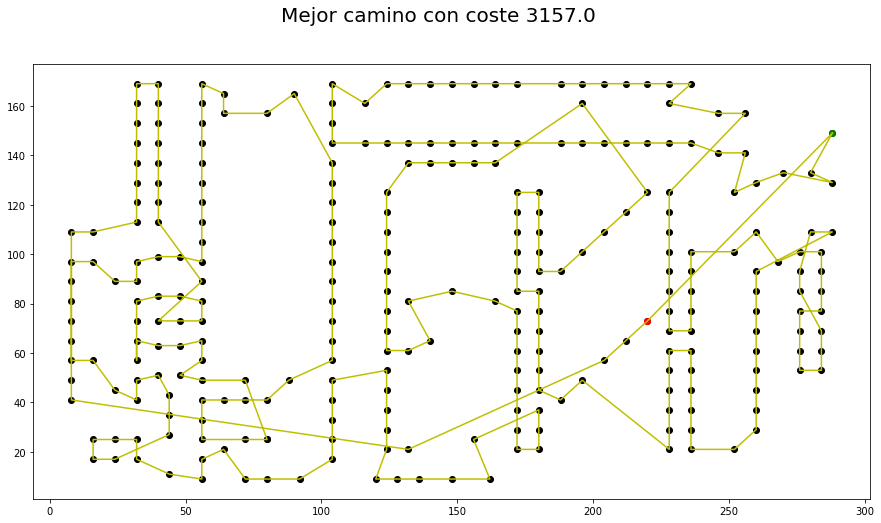

In [16]:
# Greedy
resultado, km = greedy(x, y,"s")

# Busqueda Aleatoria

In [17]:
# Algoritmo Busqueda Aleatoria
def busquedaAleatoria(x,y):
    tam = len(x)
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        mejorCoste = float("inf")
        mejor = [];
        random.seed(z)
        for j in range(0,1600*tam):
            vResult = list(range(0,tam))
            for i in range(0,tam):
                rnd = random.randint(0,tam-1)
                vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
            coste = calculaCoste(vResult)
            if coste < mejorCoste:
                mejor = vResult.copy()
                mejorCoste = coste

        if mejorCoste < costeFinal:
            costeFinal = mejorCoste
            mejorCam = mejor.copy()
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(mejorCoste)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Tiempo
0,0.0,29664.0,199.781172
1,1.0,29496.0,197.414780
2,2.0,29546.0,197.300118
3,3.0,29174.0,186.971900
4,4.0,29467.0,193.486379
5,5.0,29598.0,208.061470
6,6.0,29771.0,208.023957
7,7.0,29469.0,210.764236
8,8.0,29799.0,219.120799
9,9.0,29353.0,208.958668


Media coste:  29533.7
Desviación típica coste:  188.57715780137437


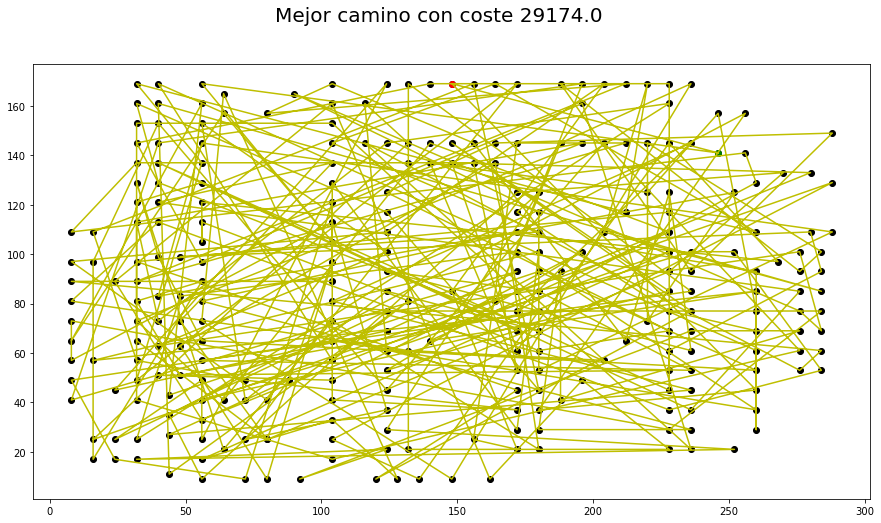

In [18]:
# Busqueda Aleatoria
busquedaAleatoria(x, y)

# Busquedas Locales

## Busqueda Local El Mejor

In [18]:
# Devuelve el mejor vecino
def mejorVecino(w, sumador, maximo):
    mejor = w;
    mejorCoste = calculaCoste(w)
    costeSolAntigua = mejorCoste.copy()
    for i in range(0, len(w)):
        for j in range(i + 1,len(w)):
            w2 = w.copy();
            w2[i], w2[j] = w2[j], w2[i]
            coste = calculaCosteVecino(costeSolAntigua, w, w2, i, j)
            if coste < mejorCoste :
                mejor = w2
                mejorCoste = coste
            if sumador >= maximo:
                break
            else :
                sumador +=1
        if sumador >= maximo:
            break
    return mejor, mejorCoste, sumador

In [19]:
# Algoritmo Busqueda Local El Mejor
def busquedaLocalElMejor(x,y):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        while encontrado == False:
            mejorV, mejorCost, i = mejorVecino(w, i, maximo)
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
                
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,26991.0,448000.0,2.512556
1,1.0,26657.0,448000.0,2.430861
2,2.0,28456.0,448000.0,2.396194
3,3.0,27242.0,448000.0,2.655564
4,4.0,26300.0,448000.0,2.553389
5,5.0,26787.0,448000.0,2.477662
6,6.0,26619.0,448000.0,2.424687
7,7.0,26315.0,448000.0,2.390255
8,8.0,25229.0,448000.0,2.381933
9,9.0,28413.0,448000.0,2.528546


Media coste:  26900.9
Desviación típica coste:  970.7263546208868
Media numero de evaluaciones:  448000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  2.475164604187012


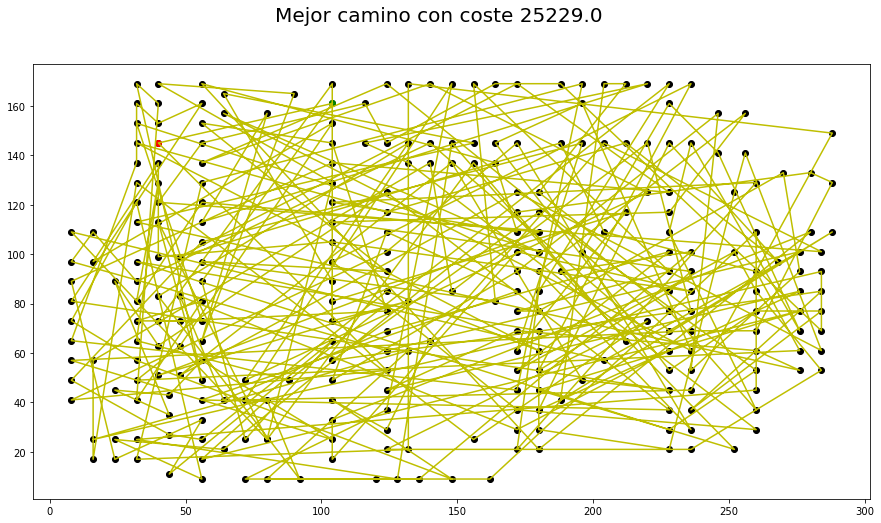

In [20]:
# Busqueda Local El Mejor
busquedaLocalElMejor(x, y)

## Busqueda Local El Primer Mejor

In [21]:
# Devuelve el primer mejor vecino
def primerMejorVecino(w, sumador, maximo):
    actual = w;
    actualCoste = calculaCoste(w)
    i = 0
    encontrado = False
    while i < len(w) and encontrado == False:
        j = i + 1
        while j < len(w) and encontrado == False:
            mejor = actual.copy()
            mejor[i], mejor[j] = mejor[j], mejor[i]
            coste = calculaCosteVecino(actualCoste, actual, mejor, i, j)
            if coste < actualCoste:
                encontrado = True
            else:
                j += 1
            if sumador >= maximo:
                break
            else :
                sumador +=1
        if sumador >= maximo:
            break
        i += 1
    if actualCoste == coste:
        mejor = w
        coste = actualCoste
    return mejor, coste, sumador

In [22]:
# Algoritmo Busqueda Local El Primer Mejor
def busquedaLocalElPrimerMejor(x,y):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        while encontrado == False:
            mejorV, mejorCost, i = primerMejorVecino(w, i, maximo)
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
                i += 1
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
        
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,9917.0,448000.0,2.820255
1,1.0,9321.0,448000.0,2.723394
2,2.0,10675.0,448000.0,2.794023
3,3.0,9065.0,448000.0,2.798588
4,4.0,8350.0,448000.0,2.725066
5,5.0,9248.0,448000.0,2.603805
6,6.0,9838.0,448000.0,2.516178
7,7.0,8408.0,448000.0,2.496658
8,8.0,8348.0,448000.0,2.546982
9,9.0,8480.0,448000.0,2.511932


Media coste:  9165.0
Desviación típica coste:  796.7814422203033
Media numero de evaluaciones:  448000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  2.6536880493164063


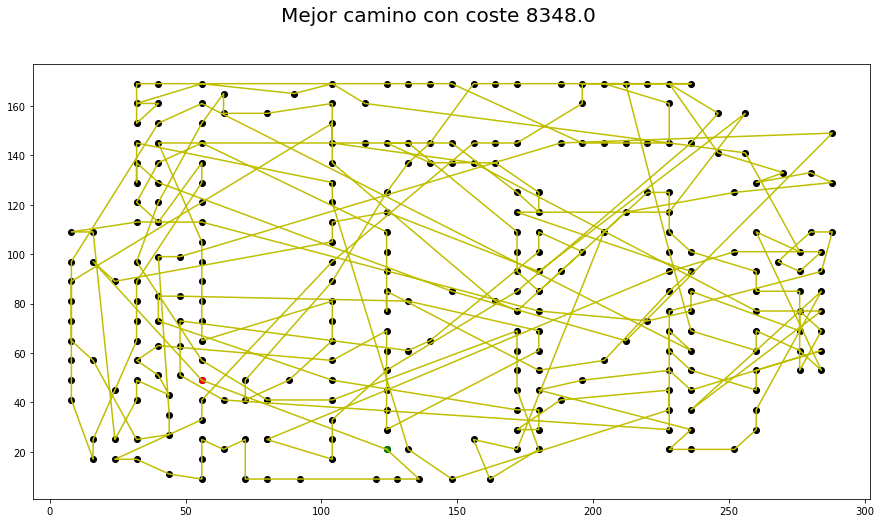

In [23]:
# Busqueda Local El Primero Mejor
busquedaLocalElPrimerMejor(x, y)

## Busqueda Local El Mejor Aleatorizado

In [24]:
# Devuelve el mejor vecino Aleatorizado
def mejorVecinoAleatorizado(w, numVecinos, sumador, maximo):
    mejor = w;
    mejorCoste = calculaCoste(w)
    costeSolAntigua = mejorCoste
    for i in range(0, numVecinos):
        w2 = w.copy();
        rnd1 = random.randint(0,len(w) - 1)
        rnd2 = random.randint(0,len(w) - 1)
        w2[rnd1], w2[rnd2] = w2[rnd2], w2[rnd1]       
        coste = calculaCosteVecino(costeSolAntigua, w, w2, rnd1, rnd2)
        if coste < mejorCoste :
            mejor = w2
            mejorCoste = coste 
        if sumador >= maximo:
            break
        else :
            sumador +=1
    return mejor, mejorCoste, sumador

In [25]:
# Algoritmo Busqueda Local El Mejor Aleatorizado
def busquedaLocalElMejorAleatorizado(x,y,numVecinosLim, k):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        encontrado = False
        while i < maximo and encontrado == False:
            iterador = 0
            fueraBucle = False
            while iterador < k and fueraBucle == False:
                iterador += 1
                mejorV, mejorCost, i = mejorVecinoAleatorizado(w, numVecinosLim, i, maximo)  
                if mejorCost < costeActual or iterador > k:
                    fueraBucle = True
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
                
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,8609.0,76440.0,0.650641
1,1.0,9015.0,77840.0,0.653960
2,2.0,9346.0,75320.0,0.614873
3,3.0,9413.0,67200.0,0.550082
4,4.0,8900.0,64120.0,0.536152
5,5.0,8462.0,82740.0,0.700934
6,6.0,10170.0,48860.0,0.400554
7,7.0,8801.0,73220.0,0.755338
8,8.0,8500.0,63140.0,0.690928
9,9.0,10021.0,43680.0,0.435124


Media coste:  9123.7
Desviación típica coste:  604.6817436562072
Media numero de evaluaciones:  67256.0
Desviación típica de evaluaciones:  12726.779465188967
Media tiempo:  0.598858642578125


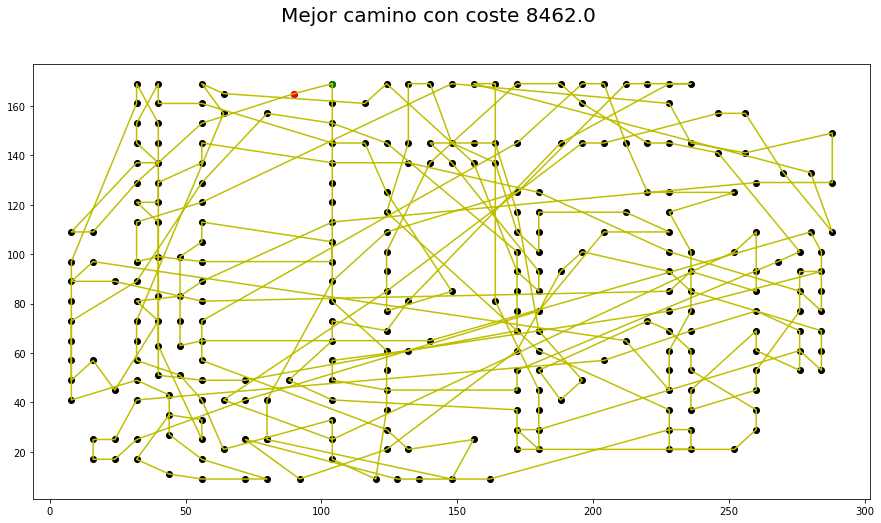

In [26]:
# Busqueda Local El Mejor Aleatorizado
numVecinosLim = round(len(x) / 2)
k = 5
busquedaLocalElMejorAleatorizado(x, y, numVecinosLim, k)

# Enfriamiento Simulado

In [27]:
# Selecciona candidatos
def seleccionaSolucion(sActual, coste):
    rnd1 = random.randint(0,len(sActual) - 1)
    rnd2 = random.randint(0,len(sActual) - 1)
    sCandidata = sActual.copy()
    sCandidata[rnd1], sCandidata[rnd2] = sCandidata[rnd2], sCandidata[rnd1]
    costeCandiata = calculaCosteVecino(coste, sActual, sCandidata, rnd1, rnd2)
    return sCandidata, costeCandiata

In [28]:
# Algoritmo de Enfriamiento Simulado
def enfriamientoSimuladoIteraciones(x, y, mu, phi, L):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        sActual = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(sActual)
        sBest = sActual.copy()
        costeBest = costeActual  
        numIteraciones = 80 * len(x)
        evaluaciones = 0
        resultado, km = greedy(x, y,"n")
        Tinicial = (mu /(- np.log(phi))) * km
        iterador = 0
        T = Tinicial
        while iterador < numIteraciones:
            for i in range(0,L):
                sCandidata, costeCandidata = seleccionaSolucion(sActual, costeActual)
                evaluaciones += 1
                delta = costeCandidata - costeActual
                exponente = (- delta) / T
                if (delta < 0) or (random.uniform(0, 1) < math.e**exponente):
                    sActual = sCandidata
                    costeActual = costeCandidata
                    if costeActual < costeBest:
                        sBest = sActual
                        costeBest = costeActual
            T = Tinicial / (1 + iterador)
            iterador += 1

        if costeBest < costeFinal:
            costeFinal = costeBest
            mejorCam = sBest.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeBest)
        resultadoIntermedio.append(evaluaciones)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,6577.0,448000.0,6.061728
1,1.0,5493.0,448000.0,6.808434
2,2.0,6438.0,448000.0,6.751607
3,3.0,6127.0,448000.0,6.143279
4,4.0,5755.0,448000.0,6.176358
5,5.0,6166.0,448000.0,5.732147
6,6.0,5594.0,448000.0,5.795171
7,7.0,5871.0,448000.0,6.704819
8,8.0,6032.0,448000.0,6.194589
9,9.0,5958.0,448000.0,5.829585


Media coste:  6001.1
Desviación típica coste:  344.76802184786357
Media numero de evaluaciones:  448000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  6.219771814346314


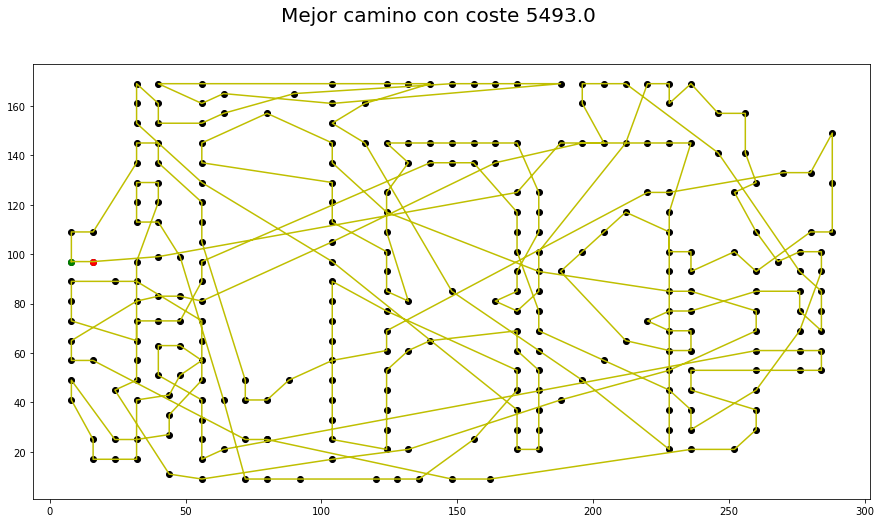

In [19]:
# Algoritmo de Enfriamiento Simulado
# Si el incremento el numero de vecinos (L) aumento la exploración y puedo conseguir llegar a un minimo
# Si el incremento es demasiado bajo, es un algoritmo muy parecido a la busqueda local del mejor aleatorizado
# Con alpha ( o metodo de enfriamiento) y L podemos variar la pendiente de la gráfica, es decir, explorar mas o menos
mu = 0.3
phi = 0.3
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,5916.0,448000.0,4.684941
1,1.0,6354.0,448000.0,4.906581
2,2.0,6551.0,448000.0,4.463899
3,3.0,6423.0,448000.0,4.750581
4,4.0,6442.0,448000.0,4.830887
5,5.0,6460.0,448000.0,5.565990
6,6.0,6144.0,448000.0,4.634953
7,7.0,6303.0,448000.0,4.563616
8,8.0,6827.0,448000.0,5.017298
9,9.0,5628.0,448000.0,4.977275


Media coste:  6304.8
Desviación típica coste:  337.91741265844496
Media numero de evaluaciones:  448000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  4.839602088928222


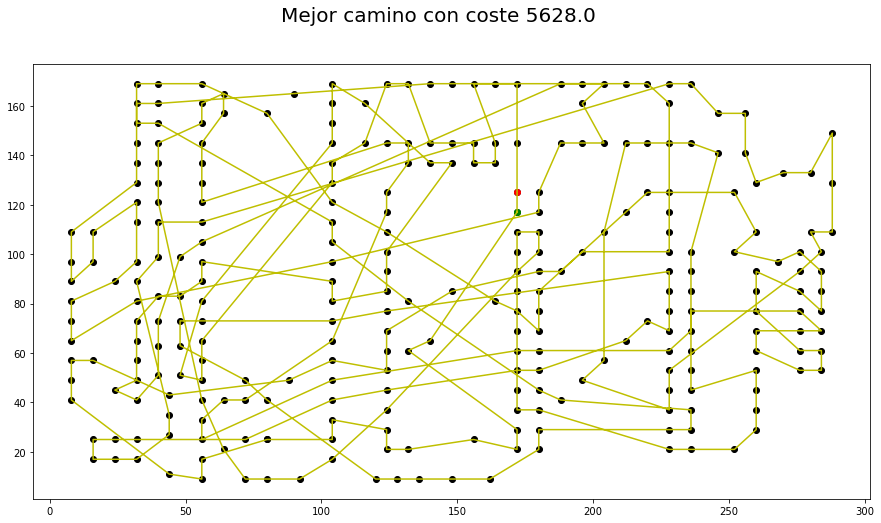

In [29]:
# Algoritmo de Enfriamiento Simulado
mu = 0.3
phi = 0.6
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,6282.0,448000.0,4.613511
1,1.0,5854.0,448000.0,4.858791
2,2.0,6196.0,448000.0,4.858545
3,3.0,5930.0,448000.0,4.795110
4,4.0,6103.0,448000.0,5.103428
5,5.0,6327.0,448000.0,4.838203
6,6.0,6447.0,448000.0,5.036403
7,7.0,6920.0,448000.0,4.923090
8,8.0,5195.0,448000.0,4.957446
9,9.0,6087.0,448000.0,4.748793


Media coste:  6134.1
Desviación típica coste:  445.1802256764482
Media numero de evaluaciones:  448000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  4.87333197593689


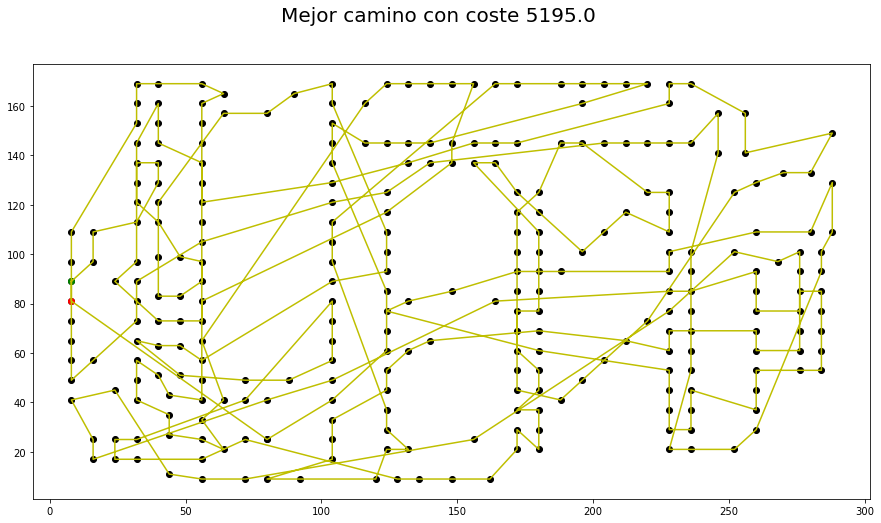

In [30]:
# Algoritmo de Enfriamiento Simulado
mu = 0.6
phi = 0.3
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,6007.0,448000.0,4.643106
1,1.0,6020.0,448000.0,4.487203
2,2.0,6216.0,448000.0,4.682448
3,3.0,6160.0,448000.0,4.610423
4,4.0,5951.0,448000.0,4.384309
5,5.0,6010.0,448000.0,4.374407
6,6.0,6257.0,448000.0,4.311400
7,7.0,5711.0,448000.0,4.729674
8,8.0,5862.0,448000.0,4.713088
9,9.0,6015.0,448000.0,5.109569


Media coste:  6020.9
Desviación típica coste:  163.1893583131776
Media numero de evaluaciones:  448000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  4.604562616348266


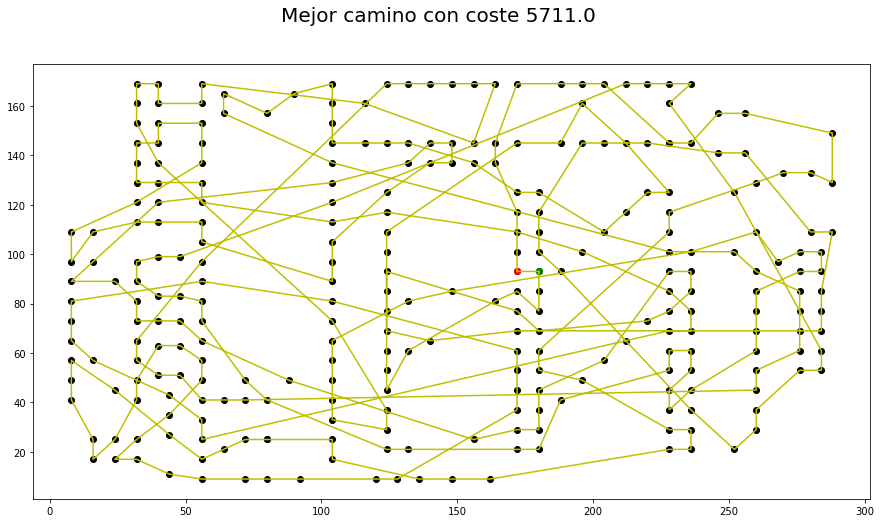

In [31]:
# Algoritmo de Enfriamiento Simulado
mu = 0.6
phi = 0.6
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,5381.0,1120000.0,12.455223
1,1.0,5571.0,1120000.0,11.993203
2,2.0,5625.0,1120000.0,12.260658
3,3.0,5200.0,1120000.0,12.447623
4,4.0,5939.0,1120000.0,12.836025
5,5.0,6023.0,1120000.0,12.101607
6,6.0,5683.0,1120000.0,12.251320
7,7.0,5519.0,1120000.0,11.212700
8,8.0,5625.0,1120000.0,11.900495
9,9.0,5392.0,1120000.0,11.029766


Media coste:  5595.8
Desviación típica coste:  249.54171327989772
Media numero de evaluaciones:  1120000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  12.04886190891266


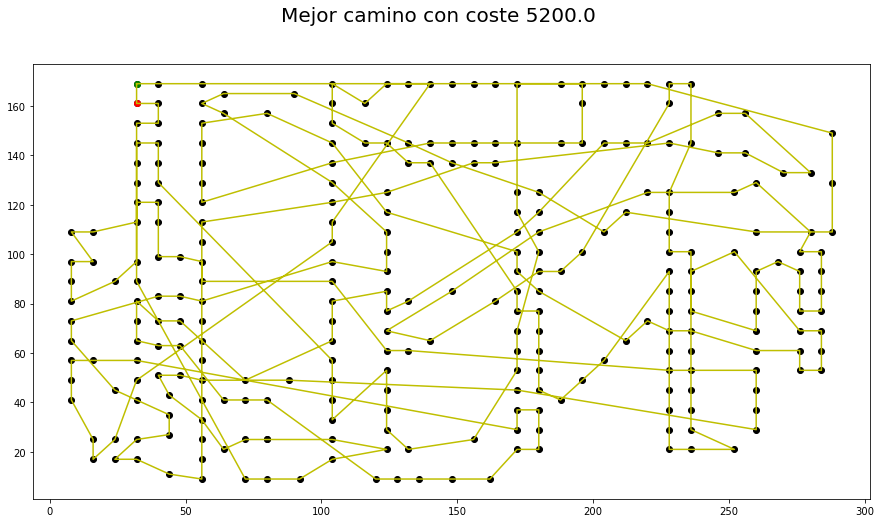

In [32]:
# Algoritmo de Enfriamiento Simulado
mu = 0.6
phi = 0.6
L = 50
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

# Búsqueda Tabú


In [33]:
# Greedy de la memoria de frecuencia eligiendo el menor
def greedyMenor(memoriaFrecuencias, n):
    memoriaTemporal = memoriaFrecuencias.copy()
    elegidos = []
    for i in range(0,n):
        provisional = np.where(memoriaTemporal[:][i] == np.amin(memoriaTemporal[:][i]))[0][0]
        elegidos.append(provisional)
        memoriaTemporal[: , provisional] = float('inf')
    
    return elegidos

In [34]:
# Algoritmo de búsqueda Tabú
def busquedaTabu(x, y, numVecinos, numIter, numReinici):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        n = len(x)
        tenenciaTabu = round(n / 2)
        listaTabu = deque(maxlen=tenenciaTabu)
        sActual = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(sActual)
        sBest = sActual.copy()
        costeBest = costeActual
        # Inicializo memoria de frecuencias
        memoriaFrecuencias = np.zeros((len(x),len(y)))
        for i in range(0,n):
            memoriaFrecuencias[i, sActual[i]] += 1
        
        iteraciones = numIter * n
        reinicializacion = round(iteraciones / (numReinici + 1))
        iterador = 0
        for i in range(0,iteraciones):
            # Genero/Analizo Vecinos
            mejorVecino = []
            costeMejor = float("inf")
            for k in range(0,numVecinos):
                piv1 = random.randint(0,len(x) - 1)
                piv2 = random.randint(0,len(x) - 1)
                sCandidata = sActual.copy()
                sCandidata[piv1], sCandidata[piv2] = sCandidata[piv2], sCandidata[piv1]
                costeCandidata = calculaCosteVecino(costeActual, sActual, sCandidata, piv1, piv2)
                iterador += 1
                
                seEvalua = False
                if((piv1,piv2) in listaTabu) or ((piv2,piv1) in listaTabu):
                    #Prueba de aspiración
                    if(costeCandidata < costeBest):
                        seEvalua = True
                else:
                    seEvalua = True
                    
                if (seEvalua and costeCandidata < costeMejor):  
                    mejorVecino = sCandidata.copy()
                    costeMejor = costeCandidata
                    mejorPiv1 = piv1
                    mejorPiv2 = piv2

            # Actualización de variables
            sActual = mejorVecino.copy()
            costeActual = costeMejor
            if costeMejor < costeBest:
                sBest = mejorVecino.copy()
                costeBest = costeMejor        

            # Actualizo Memoria de Frecuencias
            for p in range(0,n):
                memoriaFrecuencias[p, sActual[p]] += 1

            # Actualizo lista tabú
            listaTabu.append((mejorPiv1, mejorPiv2))
            
            # Reinicializaciones
            if ((i + 1) % reinicializacion) == 0:
                rnd = random.random()
                if rnd < 0.25:
                    # Solucion Inicial Aleatoria
                    sActual = random.sample(range(n),n)
                    costeActual = calculaCoste(sActual)
                elif rnd < 0.75:
                    # Solucion Greedy
                    sActual = greedyMenor(memoriaFrecuencias,n)
                    costeActual = calculaCoste(sActual) 
                else:
                    # Solucion es la mejor hasta el momento
                    sActual = sBest.copy()
                    costeActual = costeBest

                # Nueva Tenencia Tabú
                rnd2 = random.uniform(0,1)
                if rnd2 < 0.5:
                    tenenciaTabu = round(tenenciaTabu / 2)
                else:
                    tenenciaTabu = tenenciaTabu + round(tenenciaTabu / 2) 

                listaTabu = deque([],maxlen=tenenciaTabu)
        
        if costeBest < costeFinal:
            costeFinal = costeBest
            mejorCam = sBest.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeBest)
        resultadoIntermedio.append(iterador)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,3204.0,448000.0,8.671670
1,1.0,2976.0,448000.0,7.814957
2,2.0,3026.0,448000.0,17.047188
3,3.0,3334.0,448000.0,8.965649
4,4.0,3223.0,448000.0,8.207531
5,5.0,3154.0,448000.0,8.615179
6,6.0,3726.0,448000.0,8.333749
7,7.0,3575.0,448000.0,8.082948
8,8.0,3436.0,448000.0,7.482783
9,9.0,3518.0,448000.0,9.384951


Media coste:  3317.2
Desviación típica coste:  244.4566764616313
Media numero de evaluaciones:  448000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  9.260660529136658


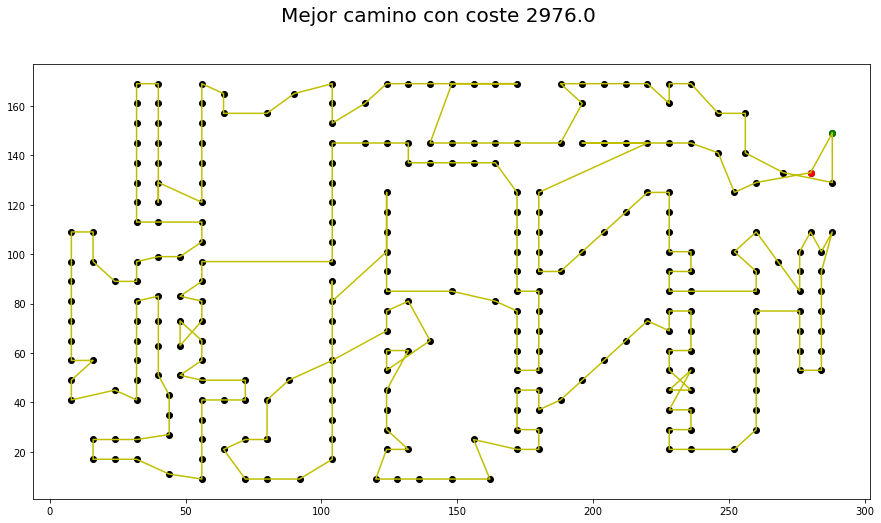

In [18]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 4
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,3242.0,672000.0,17.428544
1,1.0,3041.0,672000.0,12.071937
2,2.0,3133.0,672000.0,10.870587
3,3.0,3462.0,672000.0,12.507474
4,4.0,3505.0,672000.0,10.869658
5,5.0,3771.0,672000.0,10.952815
6,6.0,3687.0,672000.0,11.529351
7,7.0,3590.0,672000.0,14.021349
8,8.0,3261.0,672000.0,17.896747
9,9.0,4681.0,672000.0,14.286630


Media coste:  3537.3
Desviación típica coste:  467.6040704128512
Media numero de evaluaciones:  672000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  13.243509197235108


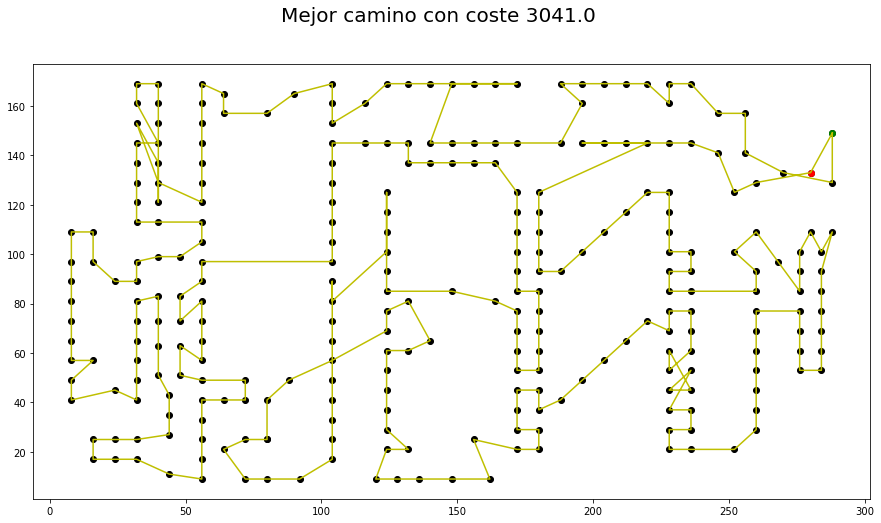

In [35]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 60
numReinici = 4
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,2864.0,448000.0,6.353641
1,1.0,2824.0,448000.0,6.131953
2,2.0,2836.0,448000.0,6.379027
3,3.0,2991.0,448000.0,6.306007
4,4.0,2821.0,448000.0,5.875639
5,5.0,2966.0,448000.0,6.524217
6,6.0,2849.0,448000.0,6.081731
7,7.0,2808.0,448000.0,6.024390
8,8.0,2828.0,448000.0,6.354993
9,9.0,2918.0,448000.0,6.465115


Media coste:  2870.5
Desviación típica coste:  64.90719871050086
Media numero de evaluaciones:  448000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  6.24967143535614


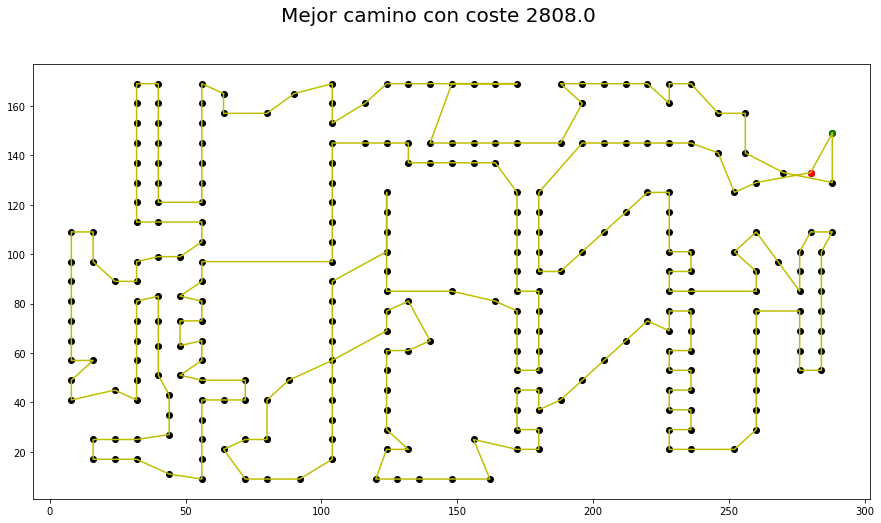

In [36]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 150
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,3108.0,784000.0,11.482963
1,1.0,3608.0,784000.0,14.618271
2,2.0,3085.0,784000.0,12.568794
3,3.0,3178.0,784000.0,20.144388
4,4.0,3597.0,784000.0,11.435299
5,5.0,3098.0,784000.0,12.263572
6,6.0,3129.0,784000.0,14.250586
7,7.0,3724.0,784000.0,10.690923
8,8.0,3418.0,784000.0,13.686302
9,9.0,3096.0,784000.0,10.379864


Media coste:  3304.1
Desviación típica coste:  255.22079765480626
Media numero de evaluaciones:  784000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  13.152096247673034


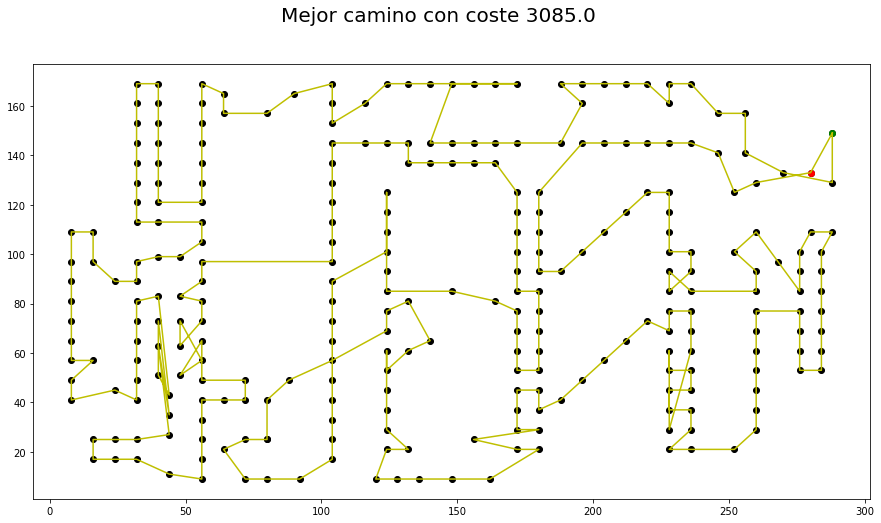

In [37]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 4
numVecinos = 70
busquedaTabu(x, y, numVecinos, numIter, numReinici)

,Semilla,Coste,Numero Evaluaciones,Tiempo
0,0.0,2875.0,1176000.0,23.205928
1,1.0,2884.0,1176000.0,16.540894
2,2.0,3460.0,1176000.0,16.675118
3,3.0,3122.0,1176000.0,19.200414
4,4.0,3127.0,1176000.0,21.269923
5,5.0,2948.0,1176000.0,39.162287
6,6.0,2941.0,1176000.0,21.716991
7,7.0,3563.0,1176000.0,22.578185
8,8.0,3038.0,1176000.0,22.025738
9,9.0,3274.0,1176000.0,21.023836


Media coste:  3123.2
Desviación típica coste:  240.27428770747264
Media numero de evaluaciones:  1176000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  22.339931559562682


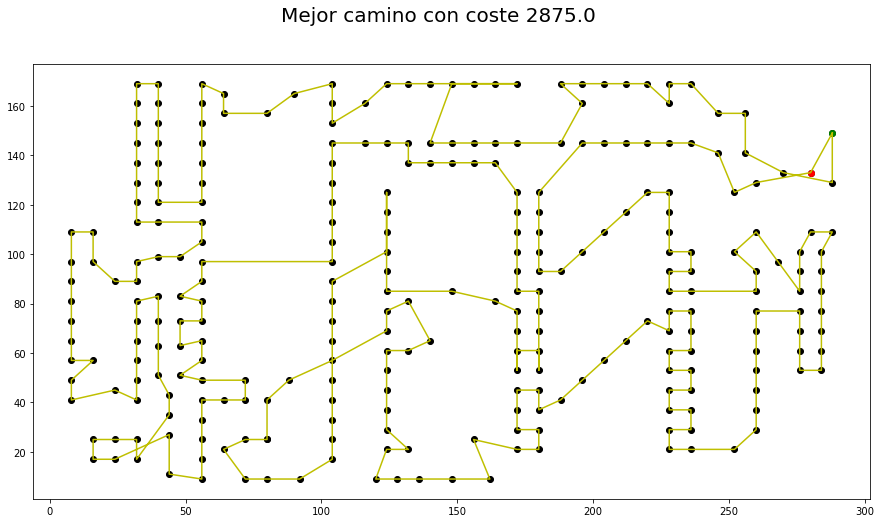

In [38]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 60
numReinici = 10
numVecinos = 70
busquedaTabu(x, y, numVecinos, numIter, numReinici)